## Parse odometry and localization data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

### Read recorded log file

In [2]:
with open('../dataset/test/odometry.json') as json_data:
    odom_raw = json.load(json_data)

In [3]:
odom_raw[:2]

[{'frame_number': 1,
  'pose_m': '(195.2, 343.5, -216.0)',
  'vel_m_sec': '(0.0, 0.0, 0.0)',
  'acc_m_sec_sec': '(0.0, 0.0, 0.0)',
  'orient_quat': '(0.0, 1.0, 0.1, -0.2)',
  'ang_vel_deg_sec': '(7.2, 1.3, 0.0)',
  'ang_acc_deg_sec_sec': '(-71.0, -41.3, 0.0)'},
 {'frame_number': 2,
  'pose_m': '(190.9, 343.5, -223.4)',
  'vel_m_sec': '(-2.2, 0.0, -3.8)',
  'acc_m_sec_sec': '(3.1, 0.0, 5.3)',
  'orient_quat': '(0.0, 1.0, 0.0, -0.3)',
  'ang_vel_deg_sec': '(0.0, 0.0, 0.0)',
  'ang_acc_deg_sec_sec': '(0.0, 0.0, 0.0)'}]

### Parse position and velocity

In [4]:
odom = odom_raw
for i in range(len(odom_raw)):
    pose = np.array( odom_raw[i]['pose_m'][1:-1].split(',') ).astype(np.float)
    odom[i]['pose_m'] = pose
    
    vel  = np.array( odom_raw[i]['vel_m_sec'][1:-1].split(',') ).astype(np.float)
    odom[i]['vel_m_sec'] = vel
    
    acc  = np.array( odom_raw[i]['acc_m_sec_sec'][1:-1].split(',') ).astype(np.float)
    odom[i]['acc_m_sec_sec'] = acc
    
    orient_quat  = np.array( odom_raw[i]['orient_quat'][1:-1].split(',') ).astype(np.float)
    odom[i]['orient_quat'] = orient_quat
    
    ang_vel_deg_sec  = np.array( odom_raw[i]['ang_vel_deg_sec'][1:-1].split(',') ).astype(np.float)
    odom[i]['ang_vel_deg_sec'] = ang_vel_deg_sec
    
    ang_acc_deg_sec_sec  = np.array( odom_raw[i]['ang_acc_deg_sec_sec'][1:-1].split(',') ).astype(np.float)
    odom[i]['ang_acc_deg_sec_sec'] = ang_acc_deg_sec_sec

In [5]:
odom[:2]

[{'frame_number': 1,
  'pose_m': array([ 195.2,  343.5, -216. ]),
  'vel_m_sec': array([0., 0., 0.]),
  'acc_m_sec_sec': array([0., 0., 0.]),
  'orient_quat': array([ 0. ,  1. ,  0.1, -0.2]),
  'ang_vel_deg_sec': array([7.2, 1.3, 0. ]),
  'ang_acc_deg_sec_sec': array([-71. , -41.3,   0. ])},
 {'frame_number': 2,
  'pose_m': array([ 190.9,  343.5, -223.4]),
  'vel_m_sec': array([-2.2,  0. , -3.8]),
  'acc_m_sec_sec': array([3.1, 0. , 5.3]),
  'orient_quat': array([ 0. ,  1. ,  0. , -0.3]),
  'ang_vel_deg_sec': array([0., 0., 0.]),
  'ang_acc_deg_sec_sec': array([0., 0., 0.])}]

### Plot results

Take into account that Unity has the following rigid body coordinate system,
[reference](https://docs.nvidia.com/isaac/isaac/doc/simulation/unity3d.html#coordinates):
- X - right
- Y - up
- Z - forward

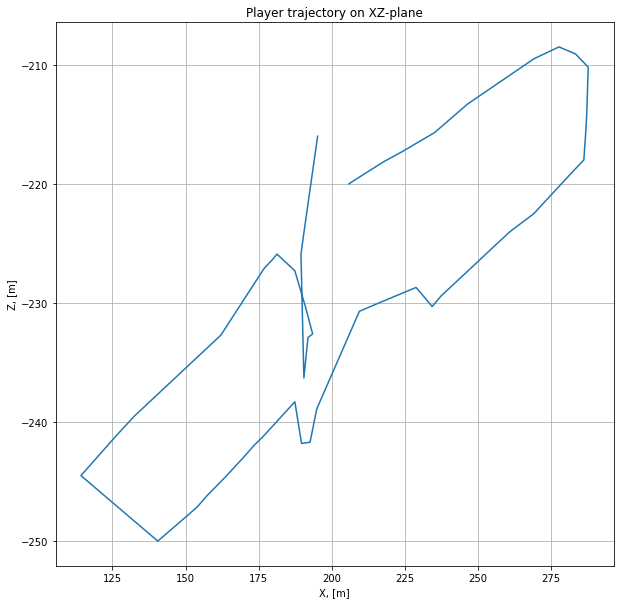

In [6]:
poses = []
for i in range(len(odom)):
    poses.append( odom[i]['pose_m'] )
poses = np.array(poses)
    
plt.figure(figsize=(10,10))
plt.title('Player trajectory on XZ-plane')
plt.plot(poses[:,0], poses[:,2])
plt.grid()
plt.xlabel('X, [m]')
plt.ylabel('Z, [m]');

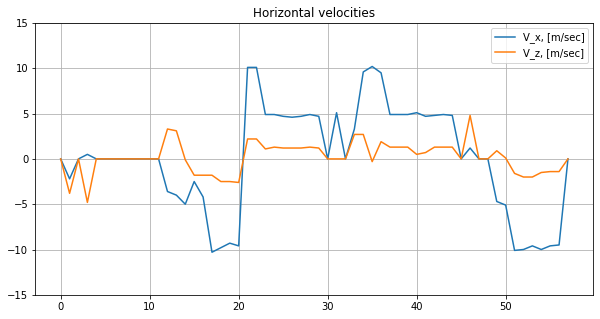

In [7]:
vels = []
for i in range(len(odom)):
    vels.append( odom[i]['vel_m_sec'] )
vels = np.array(vels)

plt.figure(figsize=(10,5))
plt.title('Horizontal velocities')
plt.plot(vels[:,0], label='V_x, [m/sec]')
plt.plot(vels[:,2], label='V_z, [m/sec]')
plt.legend()
plt.grid()
plt.ylim([-15, 15]);

## Parse detections data

In [8]:
with open('../dataset/test/detections.json') as json_data:
    dets_raw = json.load(json_data)

In [9]:
dets_raw[:1]

[{'frame_number': 1,
  'tags': 'TrafficCar, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian, Pedestrian',
  'poses_m': '(157.5, 341.7, -235.1), (183.9, 341.7, -254.4), (175.2, 341.7, -246.1), (172.3, 341.7, -199.9), (203.1, 341.7, -261.3), (175.2, 341.7, -250.4), (175.2, 341.8, -183.4), (198.3, 341.7, -240.4), (175.2, 341.8, -183.4), (213.4, 341.6, -258.6), (207.1, 341.7, -238.9), (206.1, 341.7, -238.7), (203.1, 341.7, -261.3), (198.3, 341.7, -240.4), (178.5, 341.8, -193.1), (189.9, 341.8, -242.6), (189.9, 341.8, -242.6), (231.2, 341.8, -239.9), (204.2, 341.7, -239.1), (175.2, 341.7, -250.4), (185.6, 341.7, -223.6), (175.2, 341.8, -183.4), (202.6, 341.7, -258.8), (174.0, 341.7, -246.4), (169.

In [10]:
dets = dets_raw
for i in range(len(dets_raw)):
    tags1 = dets_raw[i]['tags'].split(', ')
    dets[i]['tags'] = tags1
    
    poses1 = dets_raw[i]['poses_m'][1:-1].split('), (')
    poses1 = [np.array(p.split(',')).astype(np.float) for p in poses1]
    dets[i]['poses_m'] = poses1
    
    bbox_sizes1 = dets_raw[i]['bbox_sizes_m'][1:-1].split('), (')
    bbox_sizes1 = [np.array(p.split(',')).astype(np.float) for p in bbox_sizes1]
    dets[i]['bbox_sizes_m'] = bbox_sizes1
    
    orients_quat1 = dets_raw[i]['orients_quat'][1:-1].split('), (')
    orients_quat1 = [np.array(p.split(',')).astype(np.float) for p in orients_quat1]
    dets[i]['orients_quat'] = orients_quat1

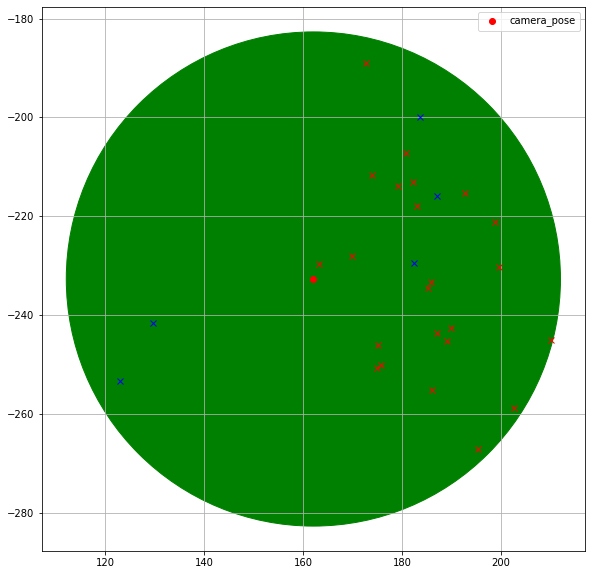

In [11]:
t = 17 #np.random.choice(len(dets))
poses1 = dets[t]['poses_m']
tags1 = dets[t]['tags']

plt.figure(figsize=(10,10))
plt.grid()
for pose, tag in zip(poses1, tags1):
    if tag == 'TrafficCar':
        color = 'b'
    elif tag == 'Pedestrian':
        color = 'r'
    plt.plot(pose[0], pose[2], 'x', color=color)
# draw camera position
camera_pose = odom[t]['pose_m']
plt.plot(camera_pose[0], camera_pose[2], 'ro', label='camera_pose')
# draw circle of detection lookup radius
R_lookup = 50.0
lookup_area = plt.Circle((camera_pose[0], camera_pose[2]), R_lookup, color='g', label='detections area')
plt.gca().add_artist(lookup_area)
plt.gca().set_aspect('equal')
plt.xlim([camera_pose[0]-(R_lookup+5.), camera_pose[0]+(R_lookup+5.)])
plt.ylim([camera_pose[2]-(R_lookup+5.), camera_pose[2]+(R_lookup+5.)])

plt.legend();

## Combine detections and odometry to form a dataset

In [12]:
import os
import cv2
import pyquaternion as pyq
import math

In [13]:
class Dataset:
    
    def __init__(self, data_path, odom_filename='odometry.json', dets_filename='detections.json'):
        files = os.listdir(data_path)
        self.image_files = []
        for file in files:
            if file.endswith('.png'):
                self.image_files.append(os.path.join(data_path, file))
        self.odom_file = os.path.join(data_path, odom_filename)
        self.dets_file = os.path.join(data_path, dets_filename)
        
        self.odom = self.parse_odom()
        self.dets = self.parse_dets()
        
        # parameters
        self.fov = {'horizontal': 70., 'vertical': 40.}
        self.R_lookup = 50.0 # [m]
        
    def parse_odom(self):
        # check if odometry file exists
        assert os.path.isfile(self.odom_file)
        
        with open(self.odom_file) as json_data:
            odom_raw = json.load(json_data)
        odom = odom_raw
        for i in range(len(odom_raw)):
            pose = np.array( odom_raw[i]['pose_m'][1:-1].split(',') ).astype(np.float)
            odom[i]['pose_m'] = pose

            vel  = np.array( odom_raw[i]['vel_m_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['vel_m_sec'] = vel

            acc  = np.array( odom_raw[i]['acc_m_sec_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['acc_m_sec_sec'] = acc

            orient_quat  = np.array( odom_raw[i]['orient_quat'][1:-1].split(',') ).astype(np.float)
            odom[i]['orient_quat'] = orient_quat

            ang_vel_deg_sec  = np.array( odom_raw[i]['ang_vel_deg_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['ang_vel_deg_sec'] = ang_vel_deg_sec

            ang_acc_deg_sec_sec  = np.array( odom_raw[i]['ang_acc_deg_sec_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['ang_acc_deg_sec_sec'] = ang_acc_deg_sec_sec
        return odom

    def parse_dets(self):
        # check if detections file exists
        assert os.path.isfile(self.dets_file)
        
        with open(self.dets_file) as json_data:
            dets_raw = json.load(json_data)
        dets = dets_raw
        for i in range(len(dets_raw)):
            tags1 = dets_raw[i]['tags'].split(', ')
            dets[i]['tags'] = tags1

            poses1 = dets_raw[i]['poses_m'][1:-1].split('), (')
            poses1 = [np.array(p.split(',')).astype(np.float) for p in poses1]
            dets[i]['poses_m'] = poses1

            bbox_sizes1 = dets_raw[i]['bbox_sizes_m'][1:-1].split('), (')
            bbox_sizes1 = [np.array(p.split(',')).astype(np.float) for p in bbox_sizes1]
            dets[i]['bbox_sizes_m'] = bbox_sizes1

            orients_quat1 = dets_raw[i]['orients_quat'][1:-1].split('), (')
            orients_quat1 = [np.array(p.split(',')).astype(np.float) for p in orients_quat1]
            dets[i]['orients_quat'] = orients_quat1
        return dets
    
    @staticmethod
    def quat_orient_diff(q1, q2):
        """
        Outputs orientation difference of quaternion `q2` relative to `q1`.
        Result is a quaternion `qd`.
        Reference: https://stackoverflow.com/questions/57063595/how-to-obtain-the-angle-between-two-quaternions
        """
        pyq1 = pyq.Quaternion(q1)
        pyq2 = pyq.Quaternion(q2)
        qd = pyq1 * pyq2.conjugate
        return qd
    
    def __getitem__(self, i):
        assert len(self.image_files) > 0
        # read image
        image = cv2.imread(self.image_files[0][:-10]+str(i+1)+'_img.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # get detections data relative to the camera
        output = {}
        output['tags'] = self.dets[i]['tags']
        output['poses'] = self.dets[i]['poses_m'] - self.odom[i]['pose_m']
        output['bbox_sizes_m'] = self.dets[i]['bbox_sizes_m']
        output['orients_quat'] = []
        for det_quat in self.dets[i]['orients_quat']:
            # convert Unity quaternion notation: q_unity = [x,y,z,w]
            # to pyquaternion notation: q_pyq = [w,x,y,z]
            q1 = [det_quat[3], det_quat[0], det_quat[1], det_quat[2]]
            camera_quat = self.odom[i]['orient_quat']
            q2 = [camera_quat[3], camera_quat[0], camera_quat[1], camera_quat[2]]
            quat_relative_to_cam = self.quat_orient_diff(q1, q2)
            output['orients_quat'].append(quat_relative_to_cam)
            
        # useful parameters
        output['camera_fov'] = self.fov
        output['lookup_radius'] = self.R_lookup
        output['camera_quat'] = pyq.Quaternion(q2).normalised
        return image, output
    
    def __len__(self):
        return len(self.image_files)

In [14]:
def quat_to_euler(q):
    q = q.normalised
    # Calculate Euler angles from pyquaternion
    phi   = math.atan2( 2 * (q.w * q.x + q.y * q.z), 1 - 2 * (q.x**2 + q.y**2) )
    theta = math.asin ( np.clip(2 * (q.w * q.y - q.z * q.x), -1, 1) )
    psi   = math.atan2( 2 * (q.w * q.z + q.x * q.y), 1 - 2 * (q.y**2 + q.z**2) )
    return phi, theta, psi

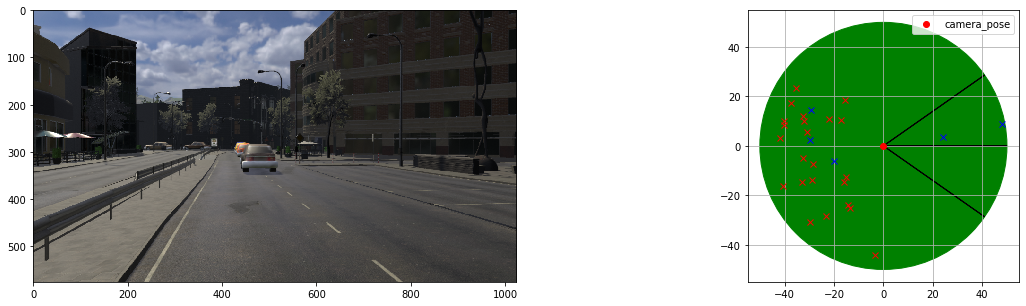

In [15]:
dataset = Dataset('../dataset/test/')

ind = np.random.choice(len(dataset))
img, out = dataset[ind]
#print('Camera heading: {:.1f} deg'.format(math.degrees(quat_to_euler(out['camera_quat'])[1])))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.imshow(img);

plt.subplot(1,2,2)
plt.grid()
for pose, tag in zip(out['poses'], out['tags']):
    if tag == 'TrafficCar':
        color = 'b'
    elif tag == 'Pedestrian':
        color = 'r'
    plt.plot(pose[0], pose[2], 'x', color=color)
    
# draw camera position
camera_pose = [0, 0, 0]
plt.plot(camera_pose[0], camera_pose[2], 'ro', label='camera_pose')

# draw circle of detection lookup radius
R_lookup = out['lookup_radius']
lookup_area = plt.Circle((camera_pose[0], camera_pose[2]), R_lookup, color='g', label='detections area')
plt.gca().add_artist(lookup_area)
plt.gca().set_aspect('equal')
plt.xlim([camera_pose[0]-(R_lookup+5.), camera_pose[0]+(R_lookup+5.)])
plt.ylim([camera_pose[2]-(R_lookup+5.), camera_pose[2]+(R_lookup+5.)])

# TODO: draw camera FOV
psi = quat_to_euler(out['camera_quat'])[1]
psi_left = quat_to_euler(out['camera_quat'])[1] - math.radians(out['camera_fov']['horizontal']/2.)
psi_right = quat_to_euler(out['camera_quat'])[1] + math.radians(out['camera_fov']['horizontal']/2.)

plt.arrow(camera_pose[0],camera_pose[2], R_lookup*np.sin(psi), R_lookup*np.cos(psi))
plt.arrow(camera_pose[0],camera_pose[2], R_lookup*np.sin(psi_left), R_lookup*np.cos(psi_left))
plt.arrow(camera_pose[0],camera_pose[2], R_lookup*np.sin(psi_right), R_lookup*np.cos(psi_right))

plt.legend();